In [1]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.3 MB/s eta 0:00:00


In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import torch
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Running on device: {}'.format(device))

Running on device: cuda


In [3]:
# Create face detector
mtcnn = MTCNN(select_largest=False, device=device)

In [4]:
# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [5]:
# Make sure all files in data folder are jpgs

folder_path = 'data'

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(file_path):
        # Check the current file extension
        _, file_extension = os.path.splitext(filename)

        if file_extension.lower() != '.jpg':
            # Load the image
            img = Image.open(file_path)

            # Convert the image to RGB mode (remove alpha channel)
            img = img.convert('RGB')

            # Create a new filename with ".jpg" extension
            new_filename = os.path.splitext(filename)[0] + '.jpg'
            new_file_path = os.path.join(folder_path, new_filename)

            # Save the image as ".jpg"
            img.save(new_file_path, 'JPEG')

            # Remove the original file
            os.remove(file_path)

3.png
4.jpg
1.jpeg
7.jpg
8.png
2.png
6.jpg
5.jpg


In [6]:
embeddings = []
images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):

  # Load an image
  file_path = os.path.join(folder_path, filename)
  frame = Image.open(file_path)

  # Detect face
  face = mtcnn(frame)

  # Calculate embedding (unsqueeze to add batch dimension)
  embedding = resnet(face.unsqueeze(0))

  embeddings.append(embedding)
  images.append(frame)

In [7]:
len(embeddings)

8

In [8]:
def plot_image_pair(idx_1, idx_2, images, embeddings):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplots_adjust(wspace=0.3)

    # Display the first image
    ax1.imshow(images[idx_1])
    ax1.axis('off')

    # Display the second image
    ax2.imshow(images[idx_2])
    ax2.axis('off')

    # Calculate and display the difference in embeddings
    diff = (embeddings[idx_1] - embeddings[idx_2]).norm().item()
    text_x = 0.5  # horizontal positioning
    text_y = 1.05  # vertical positioning
    ax1.text(text_x, text_y, f'Diff: {diff:.4f}', ha='center', transform=ax1.transAxes)

    plt.show()

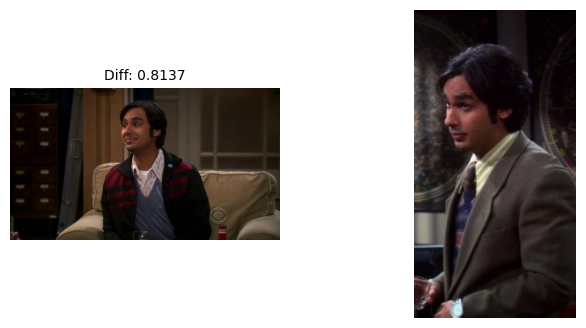

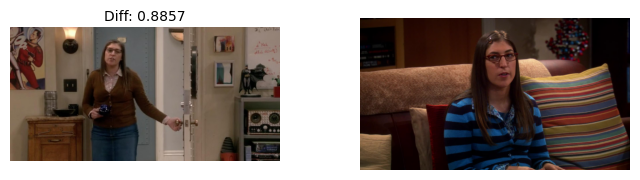

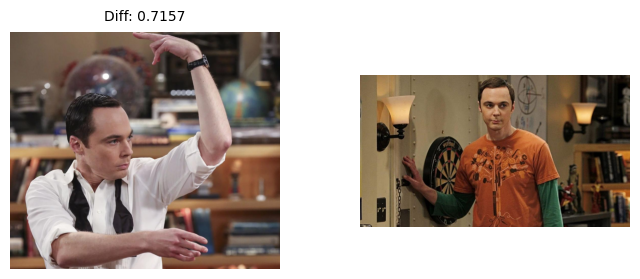

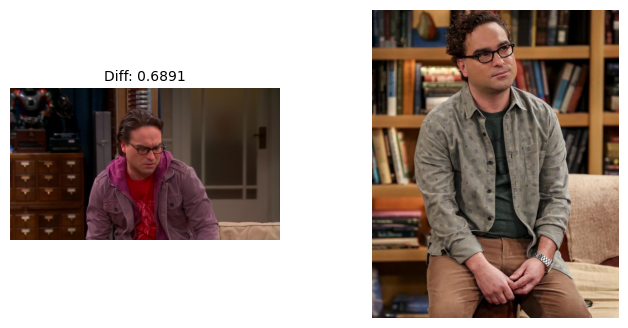

In [11]:
# Results for the same person
plot_image_pair(0, 2, images, embeddings)

plot_image_pair(1, 4, images, embeddings)

plot_image_pair(3, 5, images, embeddings)

plot_image_pair(6, 7, images, embeddings)

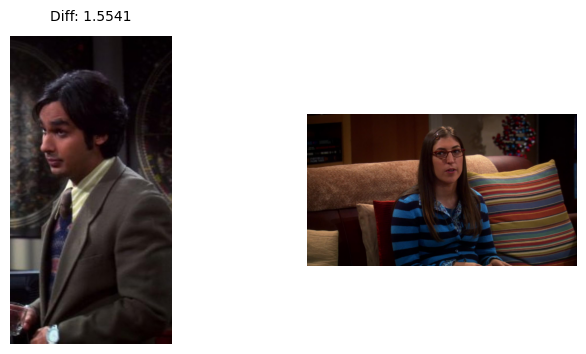

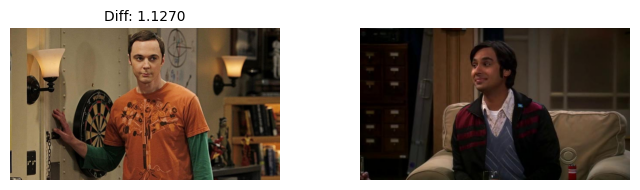

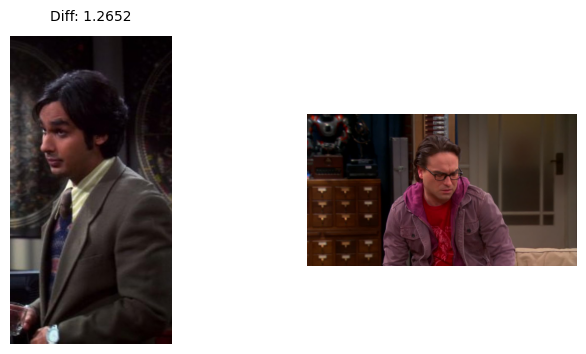

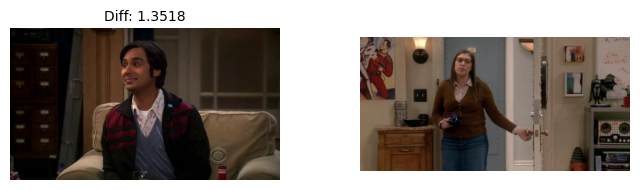

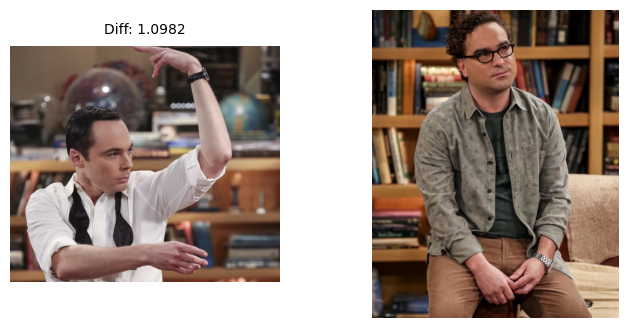

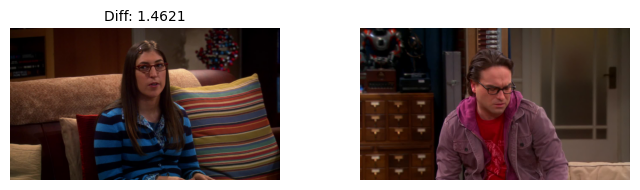

In [12]:
# Results for different people
plot_image_pair(2, 4, images, embeddings)

plot_image_pair(5, 0, images, embeddings)

plot_image_pair(2, 6, images, embeddings)

plot_image_pair(0, 1, images, embeddings)

plot_image_pair(3, 7, images, embeddings)

plot_image_pair(4, 6, images, embeddings)